<a href="https://colab.research.google.com/github/SydAt1/PyTorch-Stuff/blob/main/01_PyTorch_WorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Exploring an example PyTorch end-to-end workflow


In [ ]:
what_were_doing = {1: "data (prepare and load)",
                   2: "build model",
                   3: "fitting the model to data (training)",
                   4: "making predictions and evaluating a model (inference)",
                   5: "saving and loading a model",
                   6: "putting it all together"}

what_were_doing

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn refers to neural networks and contains PyTorch's building blocks for Neural Networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.0+cu121'

## 1. Data (preparing and loading)

Data can be almost anything.

* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* Test

Machine Learning is a game of two parts:
1. Get Data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameter**.


In [ ]:
# Create *known* parameters

weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

How splitting occurs:

* **Training set** - The model learns from this data (like the course materials you study during the semester).

* **Validation set** - The model gets tuned on this data (like the practice exam you take before the final exam).

* **Testing set** - The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester).

In [ ]:
# Create a train/test split

train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing set
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

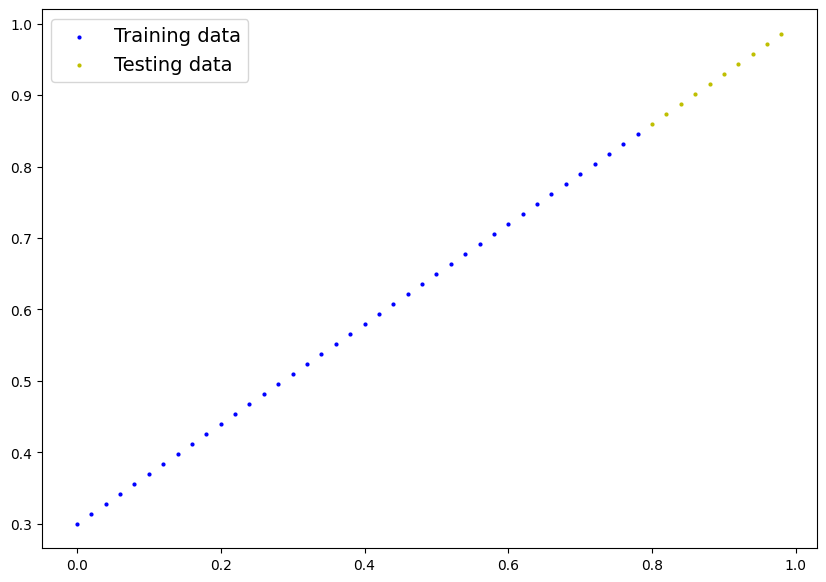

In [ ]:
plot_predictions()

## 2. Building model

The First PyTorch model!

What the model does :
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data).

How does it work?

Through two main algorithms:
1. Gradient descent - The Gradient Descent (GD) algorithm is an optimization technique for minimizing a function by iteratively moving in the direction opposite to the gradient (downhill). The key parameter in this process is the learning rate (𝜂), which scales each step. If 𝜂 is too small, GD converges slowly; if too large, it may diverge or oscillate without converging.

    * The process for GD can be summarized as:

        i) Initialize a starting point.

        ii) Calculate the gradient at this point.

        iii) Take a step in the opposite direction of the gradient, scaled by the learning rate.

        iv) Repeat until a stopping condition is met (e.g., a maximum number of iterations or step size tolerance).

2. Backpropogation

In [ ]:
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch implements from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias  # this is just the linear regression formula

### PyTorch model building essentials

* `torch.nn` - Contains all of the buildings for computational graphs (a neural network can be considered a computational graph).
* `torch.nn.Paramter` - What parameters should our model try and learn, often a PyTorch layer from `from torch.nn` will set these for us.
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should override forward().
* `torch.optim` - This is where the optimizers in PyTorch live, they will help with gradient descent.
* `def forward()` - All `nn.Module` subclasses require you to overwrite `forward()`, this method defines what happens in the forward computation.

### Checking the contents of our PyTorch model

A model has been created, now let's see whats inside the model.

Check out the model parameters or what's inside out model using. `.parameters()`



In [ ]:
# Create a random seed

manual_seed = 42
torch.manual_seed(manual_seed)

# Create an instance of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named paramters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check the model's predictive power, let's seee how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
# Make predictions with model

with torch.inference_mode():  # inference turns off the gradient tracking, so the PyTorch keeps track of lesser data, making the predictions faster
  y_preds =  model_0(X_test)
  # torch.no_grad() does similar operations, but inference.mode() is prefered

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

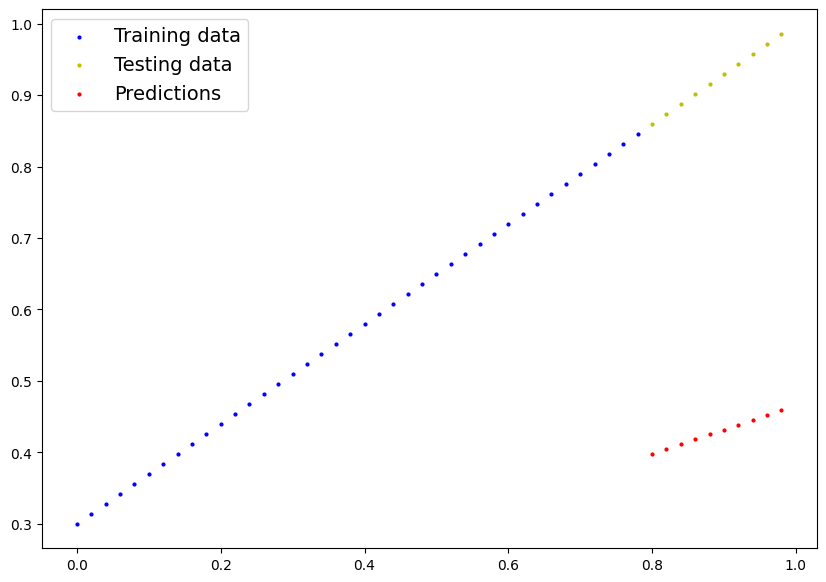

In [ ]:
plot_predictions(predictions = y_preds)

## 3. Train the Model

The whole idea of training is for a model to move from some *unknown* paramters (these may be random) to some *known* parameters.

Conversely, from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong the models predictions are is to use loss functions.

* Note - loss functions may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss Function:** A function that measures how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** takes into account the loss of a model and adjusts the model's parameters (e.g. weights & bias) to improve the loss function.
    * Inside the optimizers, two parameters will be needed to be set:

      * `params` - the model paramters you'd like to optimize (for example `params = model_0.parameters()).
      * `lr` (learning rate) - the learning is a hyperparameter that defines how big/small the optimizer changes the parameters with each step(a small `lr` results in small changes, a large `lr` results in large changes).
And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out the model's parameters (a parameter is a value that the model sets itselfs)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # lr = learning rate, possibly the most important hyperparamater you can set

### Building a training loop and a testing loop in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters with respect to the loss (**backpropagation**)
5. Optimizer step  - use the optimizer to adjust our model's parameter to try and imporve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)
# An epoch is one loop through the data. (this is a hyperparameter because it is set by user)
epochs = 100

# Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

# Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that parameters require gradient to require gradient

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)
  #print(f"loss : {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  #4 Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop
                   # So zero them in the third step

  # Testing

  # 0. Set the model to evaluation mode
  model_0.eval() # turns off different settings not needed for evaluation/testing (dropout, norm layers)

  with torch.inference_mode(): #turns off gradient tracking
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    # Print out whats happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819


In [ ]:
import numpy as np

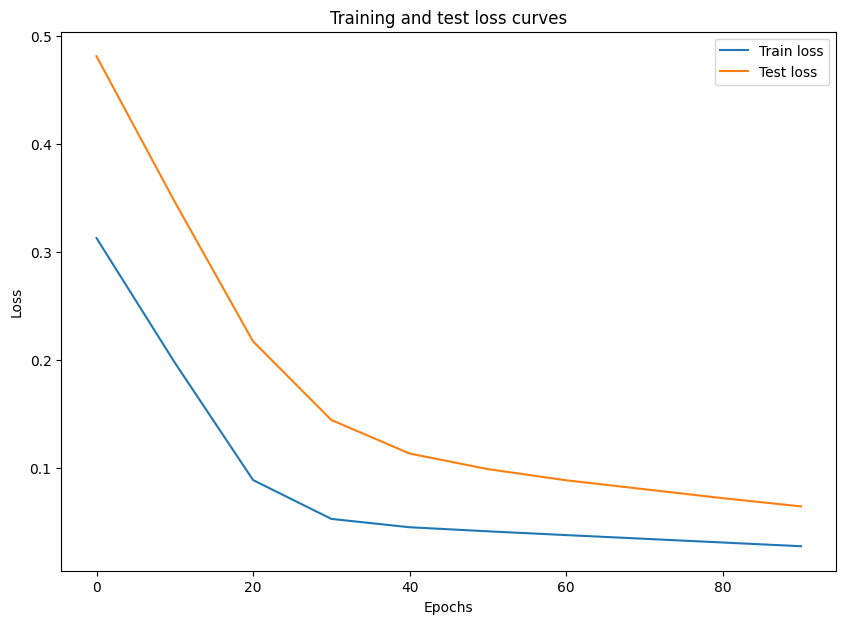

In [ ]:
# Plot the loss curve
plt.figure(figsize = (10, 7))
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

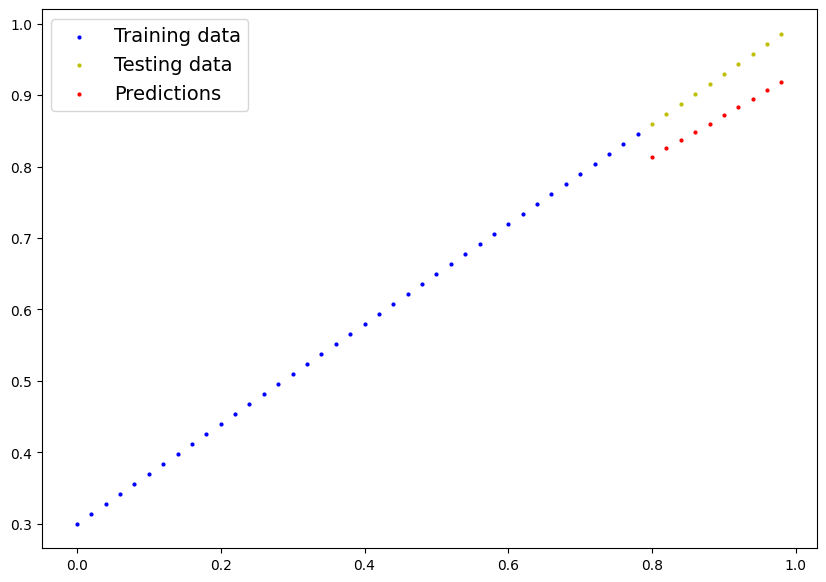

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions = y_preds_new)

## Saving a model in PyTorch

There are mainly three methods for saving and loading models in PyTorch:

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle formate.

2. `torch.load()` - allows you to load a saved PyTorch object.

3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
# Saving our PyTorch model

from pathlib import Path

# 1. Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create a model save path

MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict

print(f"Saving Model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)
#

Saving Model to : models/01_pytorch_workflow_model.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1668 Nov  9 12:00 01_pytorch_workflow_model.pth


## Loading The PyTorch Model

Since we saved the model's `state_dict()` rather than the entire model, we'll create a new instance of our model classs and load the saved `state_dict()` into that

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
# TO load in a saved state_dict we have to instantiate a new instant of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will uipdate the new instatnce with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<ipython-input-26-b65cc41ba346>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
# Make some predictions from the loaded model

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [ ]:
# MaKE SOME models preds

model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Doing it all again

## 6.1 Data


In [ ]:
import torch
# Create some data using the linear regression formula of y = weight * X + bias

weight = 0.7
bias = 0.3

# Create range values

start = 0
end = 1
step = 0.02

# Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1) # without unsqueeze, dimension erros may occue
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# split the data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:, :], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

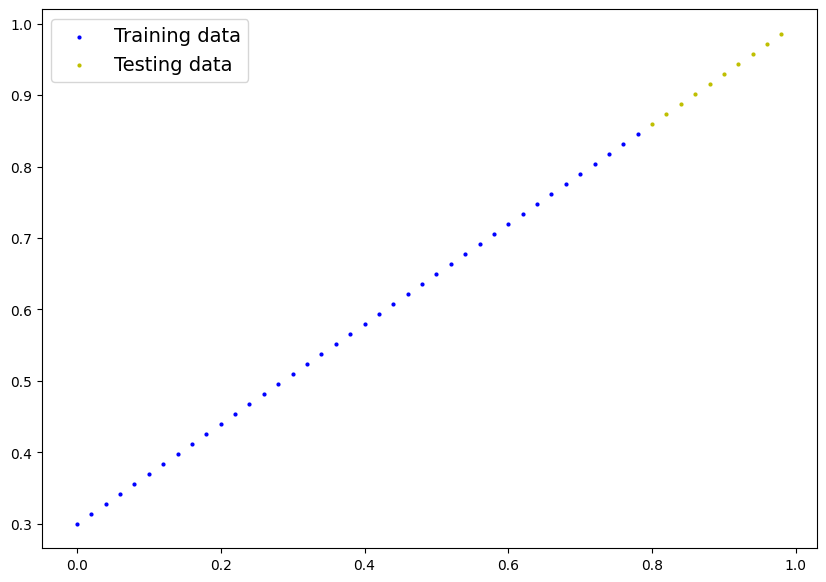

In [ ]:
# Plot the data
# Note : if you don't have the plot_predictions() function loaded, this will error

plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear Model

In [ ]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters, also called: Linear Transform, probing layer, fully connected layer
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features= 1)

    # Overwrite the forward model

  def forward (self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed

torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

## 6.3 Training/Testing the Model

For Training we need:
* Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
# Check the model current device
device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
# Set tge model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Setup the loss function

loss_fn = nn.L1Loss() # same as MAE

# Setup our optimier

optimizer = torch.optim.SGD(params = model_1.parameters(),
                             lr = 0.01)

In [ ]:
# Let's wrrite a training loop

torch.manual_seed(42)

epochs = 200

# Put device to the desired device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Training

for epoch in range(epochs):
  model_1.train()

  # 1. Forward Pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
# Turn model into evaluation mode

model_1.eval()

# Make the predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

# Plot predictions
#plot_predictions(predictions = y_preds)

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

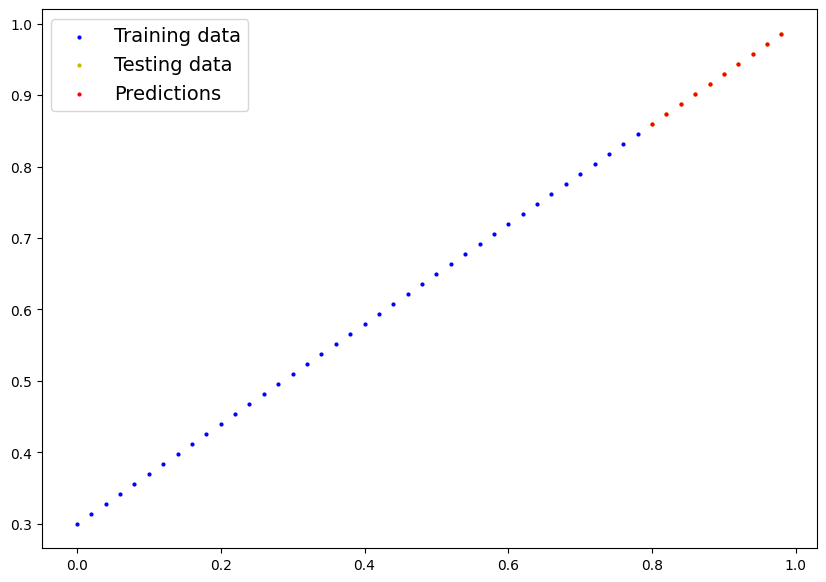

In [ ]:
# Checking the predictions visually

plot_predictions(predictions = y_preds.cpu()) # Matplot data should be in CPU

## 6. Saving a Model in PyTorch

In [ ]:
from pathlib import Path

 # 1. Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path

MODEL_NAME = "01_pytorch_workflow_model_v2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict

print(f"Saving Model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)


Saving Model to : models/01_pytorch_workflow_model_v2.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

# Exercises


### 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

* Split the data into 80% training, 20% testing.

* Plot the training and testing data so it becomes visual.

In [ ]:
# Creating data

weight = 0.3
bias = 0.9

# Create range value

start = 0
end = 1
split = 0.02

# Create X and Y models (features and Labels)

X = torch.arange(start, end, step).unsqueeze(dim = 1)
Y = weight * X + bias
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

In [ ]:
# Split the data

train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

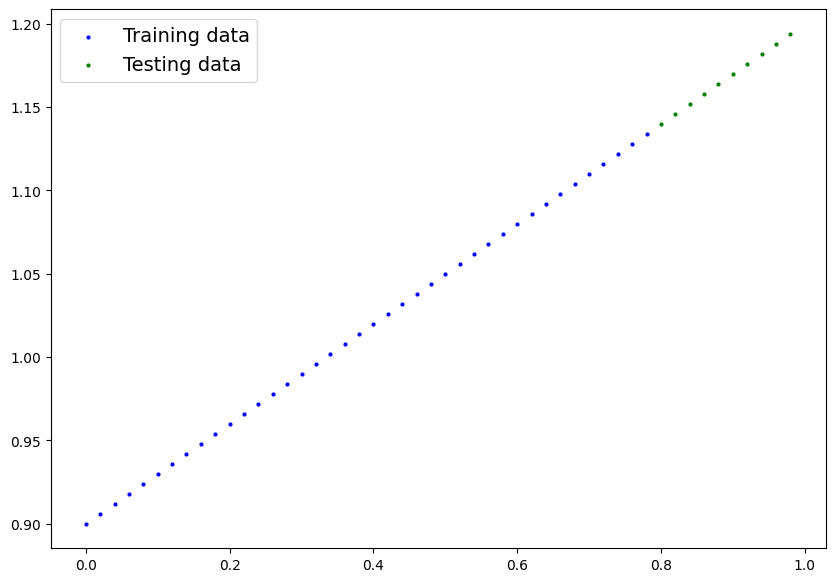

In [ ]:
# Plot the training and test data

plot_predictions(X_train, Y_train, X_test, Y_test)

### 2. Build a PyTorch model by subclassing nn.Module.
* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().
* Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [ ]:
# Subclass nn.Module to make a model

class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    # Using nn.Linear() instead of nn.Parameter() for creating model parameters
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

    # Implenting a forward() method to compute the linear regression function
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Setting a manual seed and making an instance of the class and checking its state_dict()
torch.manual_seed(42)
model_2 = LinearRegressionModelV3()
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
# Checking devices and moving the data to GPU for faster computation
model_2.to(device)
next(model_2.parameters()).device

device(type='cpu')

### 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
# create a loss function

loss_fn1 = nn.MSELoss()

# create an optimizer function

optimizer1 = torch.optim.SGD(params=model_2.parameters(), lr= 0.01, weight_decay = 0.1)

In [ ]:
list(model_2.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [ ]:
# creating a training loop

torch.manual_seed(42)

# set the number of epochs

epochs = 3000

# Put the data on the available device

X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

for epochs in range(epochs):
  # Training
  model_2.train()

  # 1. Forward pass
  y_pred = model_2(X_train)

  # 2. Calculate loss
  loss = loss_fn1(y_pred, Y_train)

  # 3. Optimize
  optimizer1.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer1.step()


  # Testing
  model_2.eval()
  # 1. Forward Pass
  with torch.inference_mode():
    test_pred = model_2(X_test)
    # 2. Calculate the loss
    test_loss = loss_fn1(test_pred, Y_test)

  if epochs % 100 == 0:
    print(f"Epoch: {epochs} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.02386246621608734 | Test loss: 0.11528835445642471
Epoch: 100 | Loss: 0.007516347803175449 | Test loss: 0.019053149968385696
Epoch: 200 | Loss: 0.006420955993235111 | Test loss: 0.009258734062314034
Epoch: 300 | Loss: 0.005139469169080257 | Test loss: 0.005246777553111315
Epoch: 400 | Loss: 0.004190645180642605 | Test loss: 0.002889372641220689
Epoch: 500 | Loss: 0.0035216924734413624 | Test loss: 0.001479166210629046
Epoch: 600 | Loss: 0.0030508278869092464 | Test loss: 0.0006723988335579634
Epoch: 700 | Loss: 0.0027178465388715267 | Test loss: 0.000249224656727165
Epoch: 800 | Loss: 0.00248093344271183 | Test loss: 6.517437577713281e-05
Epoch: 900 | Loss: 0.0023112273775041103 | Test loss: 2.575678809080273e-05
Epoch: 1000 | Loss: 0.002188735641539097 | Test loss: 6.980956823099405e-05
Epoch: 1100 | Loss: 0.002099622506648302 | Test loss: 0.0001583117264090106
Epoch: 1200 | Loss: 0.002034221775829792 | Test loss: 0.00026684999465942383
Epoch: 1300 | Loss: 0.0019858

In [ ]:
for epochs in range(epochs):
    # Training loop here
    if epochs % 100 == 0:
        print(f'Epoch {epochs}, Loss: {loss.item()}')

Epoch 0, Loss: 0.02386246621608734
Epoch 100, Loss: 0.02386246621608734
Epoch 200, Loss: 0.02386246621608734
Epoch 300, Loss: 0.02386246621608734
Epoch 400, Loss: 0.02386246621608734
Epoch 500, Loss: 0.02386246621608734
Epoch 600, Loss: 0.02386246621608734
Epoch 700, Loss: 0.02386246621608734
Epoch 800, Loss: 0.02386246621608734
Epoch 900, Loss: 0.02386246621608734
Epoch 1000, Loss: 0.02386246621608734
Epoch 1100, Loss: 0.02386246621608734
Epoch 1200, Loss: 0.02386246621608734
Epoch 1300, Loss: 0.02386246621608734
Epoch 1400, Loss: 0.02386246621608734
Epoch 1500, Loss: 0.02386246621608734
Epoch 1600, Loss: 0.02386246621608734
Epoch 1700, Loss: 0.02386246621608734
Epoch 1800, Loss: 0.02386246621608734
Epoch 1900, Loss: 0.02386246621608734
Epoch 2000, Loss: 0.02386246621608734
Epoch 2100, Loss: 0.02386246621608734
Epoch 2200, Loss: 0.02386246621608734
Epoch 2300, Loss: 0.02386246621608734
Epoch 2400, Loss: 0.02386246621608734
Epoch 2500, Loss: 0.02386246621608734
Epoch 2600, Loss: 0.0238

In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_2.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


## 4. Make predictions with the trained model on the test data.
* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
model_2.eval()

with torch.inference_mode():
  y_preds1 = model_2(X_test)
y_preds1

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

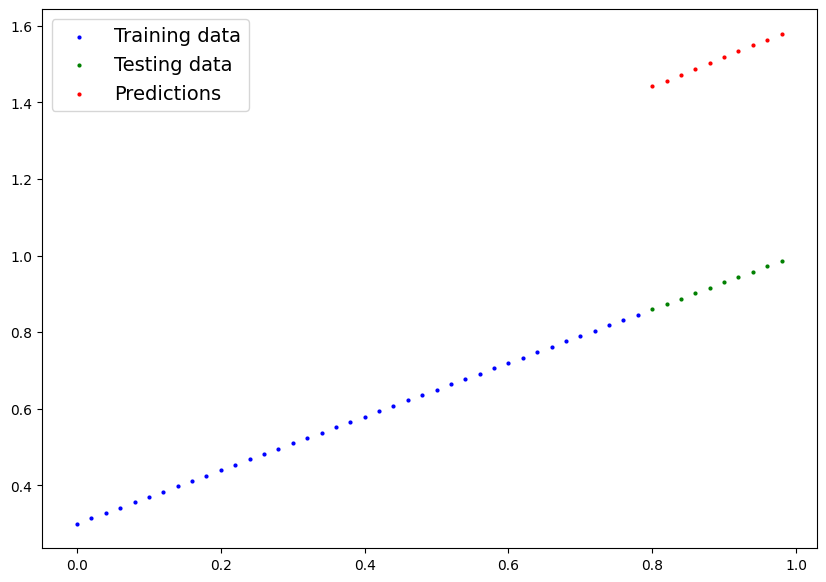

In [ ]:
plot_predictions(predictions = y_preds1)